# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Kobus Le Roux, Devon Woodman, Nhlanhla Mthembu, Koketso Maraba, Tebogo Khoza, Mxolisi Zulu, Cara Brits**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Movie Recommendation

__UPDATE ME__

### Problem Statement

__UPDATE ME__

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusions</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


Let's start by turning off unnecessary warnings in the code, to improve the aesthetics of our notebook:

In [523]:
# Turning off unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

First, we include a list of uncommon packages that may need to be installed on your system. Uncomment and run the following if you need some of the packages listed:

In [524]:
# !pip install wordcloud
# !pip install contractions
# !pip install catboost
# !pip install xgboost
# !pip install comet_ml
# !pip install emoji


Next, we import all necessary modules:

In [525]:
'''THIS IS JUST A TEMPLATE OF THE IMPORT CELL'''

# Libraries for Data Loading and Manipulation
import pandas as pd  # Pandas provides flexible data structures to manipulate structured data.
import numpy as np  # Numpy offers powerful data structures and tools for numerical computation.

# # Text Processing Libraries
# import contractions  # Contractions is used to handle English contractions, converting them into their longer forms.
# import emoji  # Emoji allows easy manipulation and analysis of emojis in the text.
# from nltk.corpus import stopwords  # Stopwords module provides a list of common words to be removed from the text.
# from nltk.stem import WordNetLemmatizer  # WordNetLemmatizer is used for lemmatizing words, bringing them to their root form.
# from nltk import download as nltk_download  # For downloading nltk packages, here 'wordnet'.
# import regex  # Regex is used for regular expression matching and manipulation.
# import string  # Provides constants and classes for string manipulation.
# import re # Provides common string operations
# import unicodedata  # Provides access to the Unicode Character Database for processing Unicode characters.

# #Data monitoring Libraries:
# from comet_ml import Experiment  # Allows developers to track, compare, explain and optimize experiments and models.

# # Machine Learning Libraries
# from catboost import CatBoostClassifier  # High-performance gradient boosting on decision trees library.
# from scipy.sparse import hstack  # Used for stacking sparse matrices horizontally.
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # Transforms text into feature vectors for machine learning.
# from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix  # Metrics for evaluating machine learning models.
# from sklearn.model_selection import train_test_split, GridSearchCV  # Provides utilities to split data and tune hyperparameters.
# from sklearn.naive_bayes import GaussianNB, MultinomialNB  # Naive Bayes classifiers for machine learning.
# from sklearn.linear_model import LogisticRegression # Logistic Regression classifier for machine learning.
# from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier for machine learning.
# from sklearn.ensemble import RandomForestClassifier # Random Forrest classifier for machine learning
# from sklearn.svm import LinearSVC, SVC  # Support Vector Machine classifiers.
# from xgboost import XGBClassifier  # XGBoost is an efficient and flexible gradient boosting library.
# import tensorflow as tf # For use in Neural Net
# from tensorflow.keras.layers import Dense # For building neural net 
# from tensorflow.keras.models import Sequential # For building neural net 
# from tensorflow.keras import utils, backend as K # For neural net add ons 

# # Feature selection Libraries:
# from sklearn.feature_selection import SelectKBest # To reduce features
# from sklearn.feature_selection import chi2 # Used to estimate which features is most impactful

# Data Visualization Libraries
import matplotlib.pyplot as plt  # Provides a way to visualize data (plotting, charts, etc.).
import seaborn as sns  # Provides a high-level interface for attractive, informative statistical graphics.
from sklearn.metrics import ConfusionMatrixDisplay # To visualize confusion matirces
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # Wordcloud is used to visualize word frequency in the text.
sns.set_theme(style="whitegrid")  # Sets the style for seaborn plots.

# # Utility Libraries
# import pickle # For saving models to file
# from sklearn.utils import resample # For resampling unbalanced data
# from imblearn.combine import SMOTETomek


# # Downloading necessary NLTK corpus
# nltk_download('wordnet')

# Global Constants for reproducibility and consistency
TRAIN_TEST_SPLIT_VAR = 0.2
RAND_STATE = 42
# MAX_TEXT_FEATURES = 50000 # For all algorithms with exception to those listed below
# RAD_SVC_Text_Features = 3000 # Specifically for use in radial svc
# NN_Text_Features = 5000 #Specifically for use of neural net
# XGB_Text_Features = 3000 # Specifically for use in XGBoost algorithm
# RESAMPLE_ENTRY_AMOUNT = 4500 # If resampling, how many entries per category (Between 1000 and 6000)
# VEC_MIN_WORD_TO_REMOVE = 1 # Remove words that occurs less that this value in dataset 


# Flags for notebook Execution
COMET_FLAG = False # To gauge wether to commit experiments to Comet ML
# VECTORIZER_TO_USE = "tfidf" # Chooses between TfIDF vectorizer or count Vectorizer - accepted values are "tfidf" or "count"
# RESAMPLE = False # Whether to resample training data
# REMOVE_OVERUSED_WORDS = False # Wether to remove non-class specific words that occurs a lot

# Comet variables for logging experiments
COMET_API_KEY = "###########"
COMET_PROJECT_NAME = "########"
COMET_WORKSPACE = "#########"


# # Select which models to tune hyperparameters on
# HYPERPARAM_TO_Tune = {
#     "Logistic Regression" : False,
#     "Decision Tree": False,
#     "Random Forrest": False,
#     "Linear Support Vector": False,
#     "Radial Support Vector": False,
#     "Gaussian Naive Bayes": False,
#     "Multinomial Naive Bayes": False,
#     "CatBoost": False,
#     "XGBoost": False
# }





<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The dataset available for this task comprises of millions of 5-star ratings provided by users of the online movie recommendation service, MovieLens. The MovieLens dataset has been extensively utilized by both industry and academic researchers to enhance the effectiveness of recommender systems that rely on explicit feedback. For this specific recommender model, we will be utilizing a modified edition of the MovieLens dataset that includes supplementary data and has been resampled. This modification aims to enrich the dataset and enable a more equitable assessment of the predictions made.

Since this dataset is extremely large, it will not be included in the GitHub repository along with this notebook, but can be downloaded from [here](https://www.kaggle.com/competitions/edsa-movie-recommendation-predict/data). The dataset consists of 8 files, each of which will be described below:

First up is the `genome_scores.csv` and `genome_tags.csv` files. The tag genome represents the degree to which movies possess specific characteristics indicated by tags, such as being atmospheric, thought-provoking, or realistic, among others. This tag genome was generated through a machine learning algorithm that processed user-contributed content, including tags, ratings, and textual reviews. By analyzing this content, the algorithm determined the associations between tags and movie properties, providing a comprehensive understanding of the attributes expressed by different films.

The `genome_scores.csv` file contains a score mapping the strength between movies and tag-related properties in the following format:

```csv
movieId,tagId,relevance
```
Here:

* __movieID__ contains the  movie identification number for our data
* __tagID__ contains the unique identification number for each tag present within the dataset
* __relevance__ contains a score between $0$ and $1$ representing how strongly movies exhibit particular properties represented by tag in question




In [526]:
# Reading data from the genome_scores.csv file and displaying format of the dataframe:
genome_scores_df = pd.read_csv("genome_scores.csv")
genome_scores_df.head(10)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
5,1,6,0.14675
6,1,7,0.06350
7,1,8,0.20375
8,1,9,0.20200
9,1,10,0.03075


The `genome_tags.csv` file provides the tag descriptions for the tag IDs in the genome file, in the following format:
```csv
tagId,tag
```

Here:

* __tagID__ contains the unique identification number for each tag present within the dataset
* __tag__ contains the text description of the tag in question

In [527]:
# Reading data from the genome_tags.csv file and displaying format of the dataframe:
genome_tags_df = pd.read_csv("genome_tags.csv")
genome_tags_df.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


Next up is the `imdb_data.csv` file, which contains additional movie metedata scraped from IMDB in the following format:
```csv
movieId, title_cast, director, runtime, budget, plot_keywords
```
Here:
* __movieID__ contains the  movie identification number for our data
* __title_cast__ contains the actors cast within the move, seperated by *|*
* __director__ contains the name of the movie director
* __runtime__ contains the movie runtime in minutes
* __budget__ contains the movie budget in USD ($)
* __plot_keywords__ containd keywords describing the plot, seperated by *|*
  

In [528]:
# Reading data from the imdb_data.csv file and displaying format of the dataframe:
imdb_data_df = pd.read_csv("imdb_data.csv")
imdb_data_df.head(10)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
5,6,Al Pacino|Robert De Niro|Val Kilmer|Jon Voight...,Michael Mann,170.0,"$60,000,000",gun battle|organized crime|honor|criminal inve...
6,7,Harrison Ford|Julia Ormond|Greg Kinnear|Nancy ...,Samuel A. Taylor,127.0,"$58,000,000",character name as title|chauffeur|estate|playboy
7,8,Jonathan Taylor Thomas|Brad Renfro|Eric Schwei...,Mark Twain,97.0,NaN,rescue from drowning|near drowning|character n...
8,9,Jean-Claude Van Damme|Powers Boothe|Raymond J....,Karen Elise Baldwin,111.0,"$35,000,000",hockey|death in title|two word title|terrorist
9,10,Pierce Brosnan|Sean Bean|Izabella Scorupco|Fam...,Ian Fleming,130.0,"$60,000,000",official james bond series|james bond characte...


We also have the `links.csv` file, which contain identifiers that can be used to link to other sources of movie data from different sources. It is in the format

```csv
movieId,imdbId,tmdbId
```

Here:
* __movieID__ contains the identifier used by [*MovieLens*](https://movielens.org)
* __imdbID__ contains the identifier used by [*IMBD*](http://www.imdb.com)
* __tmdb__ contains the identifier used by [*The Movie Data Base*](https://www.themoviedb.org)

In [529]:
# Reading data from the links.csv file and displaying format of the dataframe:
links_df = pd.read_csv("links.csv")
links_df.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


The `movies.csv` file contains movie information in the following format:

```csv
movieId,title,genres
```

Here:
* __movieID__ contains the unique movie ID number
* __title__ contains the movie title and the year of release in parenthesis (might contain some errors)
* __genres__ contains a pipe separated list of applicable genres for the movie

The list of available genres are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

In [530]:
# Reading data from the movies.csv file and displaying format of the dataframe:
movies_df = pd.read_csv("movies.csv")
movies_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


We also have access to the `tags.csv` file. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

```csv
userId,movieId,tag,timestamp
```
The lines within this file are ordered first by userId, then, within user, by movieId. Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Here:
* __userID__ contains the specific identification number for each user
* __movieID__ contains the unique identification number for each movie
* __tag__ contains the user generated tag for the movie
* __timestamp__ represents seconds since midnight Coordinated Universal Time (UTC) of *January 1, 1970*

In [531]:
# Reading data from the tags.csv file and displaying format of the dataframe:
tags_df = pd.read_csv("tags.csv")
tags_df.head(10)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


Lastly, we have our `test.csv` and `train.csv` datafiles. These datafiles represents the respective testing and training splits of the dataset. 

The file `train.csv` contains user and movie ID's along with the associated rating data in the format:
```csv
userId,movieId,rating,timestamp
```

Here:
* __userID__ represents the unique number identifying each user
* __movieID__ represents the unique number identifying each user
* __rating__ represents a score out of 5 given to each movie by each user. Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars)
* __timestamp__ represents the seconds since midnight Coordinated Universal Time (UTC) of *January 1, 1970*

In [532]:
# Reading data from the train.csv file and displaying format of the dataframe:
train_df = pd.read_csv("train.csv")
train_df.head(10)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
5,120949,81768,3.0,1289595242
6,19630,62049,4.0,1246729817
7,21066,2282,1.0,945785907
8,117563,120474,4.0,1515108225
9,144018,1997,5.0,1109967647


The `test.csv` file is similar to that of `train.csv`, but the rating data and timestamp is omitted. Therefore it has the structure
```csv
userId,movieId
```

These columns represent the same variables described for `train.csv` above

In [533]:
# Reading data from the test.csv file and displaying format of the dataframe:
test_df = pd.read_csv("test.csv")
test_df.head(10)

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
5,1,8405
6,1,8786
7,2,150
8,2,356
9,2,497


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Before we can start building accurate and cohesive models, it is of paramount importance to truly understand the data. This section is dedicated to our Exploratory Data Analysis (EDA). This is a crucial step in data analysis that aims to understand the dataset's structure, patterns, and underlying relationships. It involves examining and visualizing the data, identifying missing values, outliers, and anomalies, as well as performing statistical calculations and descriptive statistics. EDA helps uncover insights, gain familiarity with the data, and inform subsequent steps in the analysis process, such as feature selection, data preprocessing, and modeling. It aids in making informed decisions, formulating hypotheses, and guiding further exploration or modeling techniques to extract meaningful insights from the data.

### 3.1 General structure of the data



In [534]:
# For each relevant dataframe, check and discuss 1) Df.info(), 2) Null or missing values 3) Repeating entries 

### 3.2 Most and least popular:

#### 3.2.1 Movies

In [535]:
# Check the best and least rated movies

#### 3.2.2 Genres

In [536]:
# Check the best and least rated genres

#### 3.2.3 Directors

In [537]:
# Check the best and least rated Directors

#### 3.2.4 Cast Members

We can also consider the cast members starring in the best performing movies, to gain insight into which actors may perform better in ratings compared to others. The first step is to create a list of actors featuring within the dataset. We start by filtering out the cast column from our IMDB data

In [538]:
# Filter out actors from data
df_imdb_actors_eda = imdb_data_df[["movieId", "title_cast"]]

# Making sure our cast is of type string
df_imdb_actors_eda["title_cast"] = df_imdb_actors_eda["title_cast"].astype(str)

df_imdb_actors_eda.head()

,movieId,title_cast
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...


Next, we apply some text handling to split the actors into single entities:

In [539]:
# Replace spaces with underscores so that actor name and surname stays together
df_imdb_actors_eda["title_cast"] = df_imdb_actors_eda["title_cast"].str.replace(" ", "_")

# Replace pipe character | with a space in order to split the actors into different word entities
df_imdb_actors_eda["title_cast"] = df_imdb_actors_eda["title_cast"].str.replace("|", " ")

# Converting actors in each movie to a list 
df_imdb_actors_eda["title_cast"] = df_imdb_actors_eda["title_cast"].str.split()

df_imdb_actors_eda.head()

,movieId,title_cast
0,1,"[Tom_Hanks, Tim_Allen, Don_Rickles, Jim_Varney..."
1,2,"[Robin_Williams, Jonathan_Hyde, Kirsten_Dunst,..."
2,3,"[Walter_Matthau, Jack_Lemmon, Sophia_Loren, An..."
3,4,"[Whitney_Houston, Angela_Bassett, Loretta_Devi..."
4,5,"[Steve_Martin, Diane_Keaton, Martin_Short, Kim..."


Creating a list that contains all appearances of all actors within our database:

In [540]:
# Create empty list
all_actors = []

# Populate list with all actor appearances in the data
for index, row in df_imdb_actors_eda.iterrows():
    for actor in row["title_cast"]:
        all_actors.append(actor)

print(all_actors[:30])

['Tom_Hanks', 'Tim_Allen', 'Don_Rickles', 'Jim_Varney', 'Wallace_Shawn', 'John_Ratzenberger', 'Annie_Potts', 'John_Morris', 'Erik_von_Detten', 'Laurie_Metcalf', 'R._Lee_Ermey', 'Sarah_Freeman', 'Penn_Jillette', 'Jack_Angel', 'Spencer_Aste', 'Robin_Williams', 'Jonathan_Hyde', 'Kirsten_Dunst', 'Bradley_Pierce', 'Bonnie_Hunt', 'Bebe_Neuwirth', 'David_Alan_Grier', 'Patricia_Clarkson', 'Adam_Hann-Byrd', 'Laura_Bell_Bundy', 'James_Handy', 'Gillian_Barber', 'Brandon_Obray', 'Cyrus_Thiedeke', 'Gary_Joseph_Thorup']


Let's construct a dataframe containing the frequency of all actor appearances in the data:

In [541]:
# Function to count frequency of appearances in list:
def count_actors(actor_list, freq_dict={}):
    """ this function takes in a list of actors and returns a dictionary 
        with each actor as a key, and the value represents the number of 
        times that actor appeared"""
    for actor in actor_list:
        if actor in freq_dict.keys():
            freq_dict[actor] += 1
        else:
            freq_dict[actor] = 1
    return freq_dict

# Create empty dictionary to store actor frequencies
actor_freq = {}

# Applying the function
count_actors(all_actors, actor_freq)

# Removing empty values from consideration
actor_freq.pop('nan')

# Sort dictionary on actor count
actor_freq = sorted(actor_freq.items(), key=lambda x:x[1], reverse=True)

print(actor_freq[0:12])

[('Samuel_L._Jackson', 83), ('Steve_Buscemi', 68), ('Keith_David', 61), ('Willem_Dafoe', 59), ('Robert_De_Niro', 58), ('Christopher_Walken', 57), ('Brian_Cox', 57), ('Gérard_Depardieu', 57), ('Bruce_Willis', 56), ('Morgan_Freeman', 56), ('Danny_Glover', 56), ('Nicolas_Cage', 55)]


Lets investigate the most occurring actors in the dataset: 

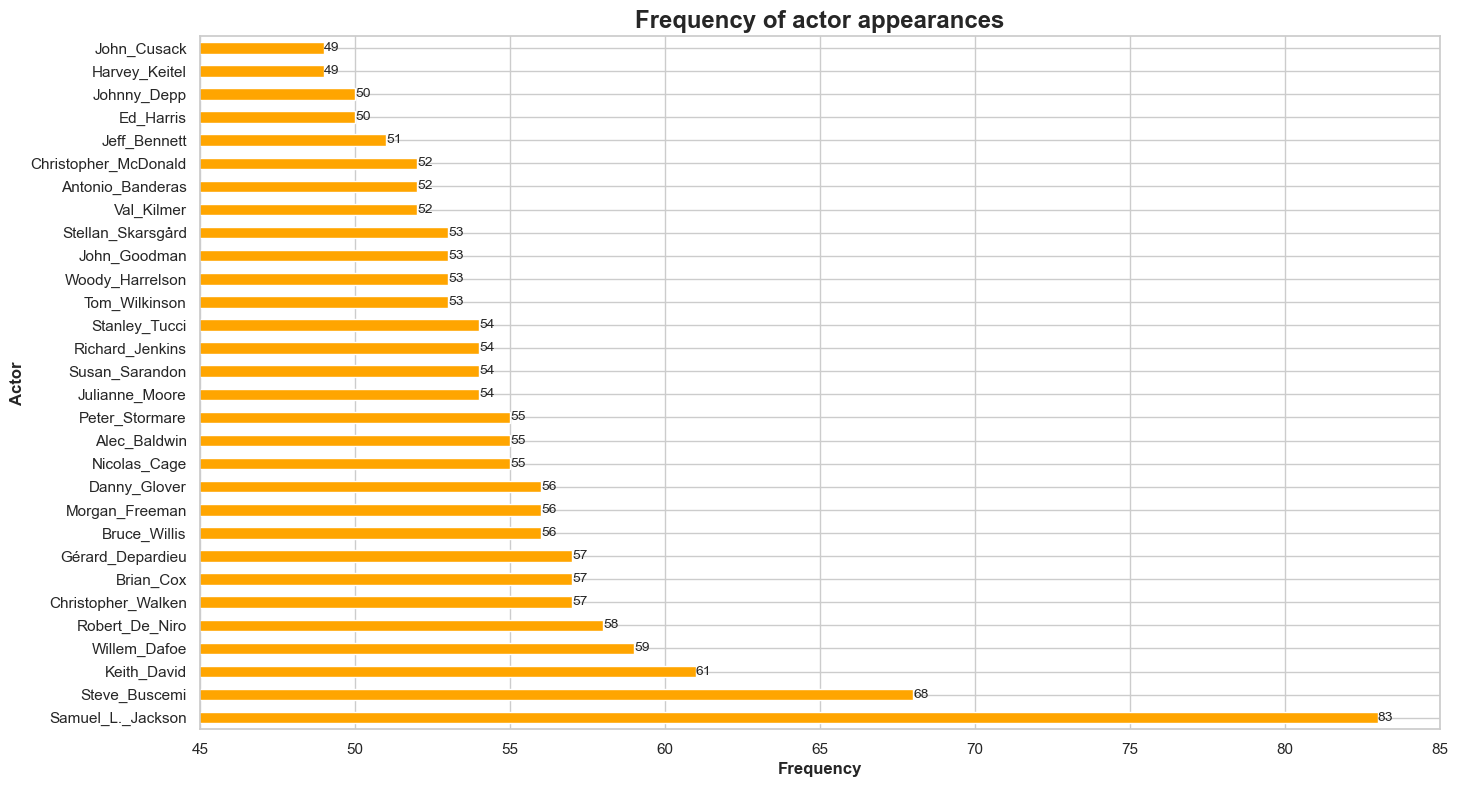

In [542]:
# Create dataframe from dictionary
df_actor_counts = pd.DataFrame(actor_freq, columns=["Actor", "Frequency"])

# Select 30 most occurring actors
df_to_plot = df_actor_counts.head(30)

# Plotting the most occurring actors
graph = df_to_plot.plot(x="Actor", kind='barh',   figsize=(16,9), xlim=[45,85],  legend=False, color = "Orange")
graph.set_title("Frequency of actor appearances", fontweight='bold', fontsize="x-large")
graph.set_xlabel("Frequency", fontweight='bold')
graph.set_ylabel("Actor", fontweight='bold')
for container in graph.containers:
    graph.bar_label(container, fontsize="small")

We see that _Samuel L. Jackson_ is by far the most appearing actor within our dataset, having starred in 83 movies present within our dataset. Among the most featured actors, we also find that most of them appears between 50 and 60 times within the dataset. Also something worth noting is that among the top 30 most occuring actors within our date, only 2 are female, namely __Julianne Moore__ and __Susan Sarandon__

To extend on this, lets dive further into the data and try to arrange our actors not by the amount of movies that they have starred in, but the average rating of all the movies that they have starred in. Doing so, we can identify our highest and lowest performing actors

Let's first consider all the movies we have ratings for, and how many reviews each got:

In [543]:
# Creating a copy of rating data
eda_ratings_df = train_df

# Getting amount of ratings for each movie
movie_rating_counts = pd.DataFrame(eda_ratings_df["movieId"].value_counts())
movie_rating_counts.rename(columns={"count":"review_count"}, inplace=True)

# Creating new feature containing movie rating counts 
eda_ratings_df = pd.merge(eda_ratings_df, movie_rating_counts, on="movieId", how="left")
eda_ratings_df.head()


,userId,movieId,rating,timestamp,review_count
0,5163,57669,4.0,1518349992,4253
1,106343,5,4.5,1206238739,4648
2,146790,5459,5.0,1076215539,5730
3,106362,32296,2.0,1423042565,658
4,9041,366,3.0,833375837,1077


We start by averaging our ratings data based on the movie:

In [544]:
# Getting average ratings for movies:
movie_average_ratings_df = eda_ratings_df.groupby(by="movieId").mean()
movie_average_ratings_df.drop(["userId", "timestamp"], axis=1, inplace=True)
movie_average_ratings_df.sort_values(by="review_count", ascending=False).head(10)

,rating,review_count
movieId,,
318,4.417624,32831.0
356,4.047216,32383.0
296,4.195097,31697.0
593,4.144172,29444.0
2571,4.154253,29014.0
260,4.111811,27560.0
480,3.684634,25518.0
527,4.247625,24004.0
110,3.994119,23722.0


To ensure statistically relevant ratings, we disregard all movies with fewer than 50 ratings from consideration when determining best performing actors

In [545]:
# Remove low reviewed movies from consideration
print("Before filtering review count:", len(movie_average_ratings_df)) 
movie_average_ratings_df = movie_average_ratings_df[movie_average_ratings_df["review_count"]>=300]
print("After filtering review count:", len(movie_average_ratings_df))


Before filtering review count: 48213
After filtering review count: 4397


We see that more than half of the movies contains less than 10 reviews, and were removed from consideration for determining the best performing actors. We can safely join our movie reviews to our actors dataframe:

In [546]:
# Merging average review value to actor data
df_actor_movie_ratings = pd.merge(df_imdb_actors_eda, movie_average_ratings_df, on="movieId",how="inner" )
df_actor_movie_ratings.head()

,movieId,title_cast,rating,review_count
0,1,"[Tom_Hanks, Tim_Allen, Don_Rickles, Jim_Varney...",3.889971,23062.0
1,2,"[Robin_Williams, Jonathan_Hyde, Kirsten_Dunst,...",3.263414,9654.0
2,3,"[Walter_Matthau, Jack_Lemmon, Sophia_Loren, An...",3.132325,4727.0
3,4,"[Whitney_Houston, Angela_Bassett, Loretta_Devi...",2.878099,968.0
4,5,"[Steve_Martin, Diane_Keaton, Martin_Short, Kim...",3.059165,4648.0


Now, we obtain the average rating per actor to determine which actors perform the best:

In [547]:
# Function to get average actor ratings
def get_actor_ratings(df_input):
    # Create empty output dataframe
    output_dict = {}

    # Iterate over input dataframe
    for index, row in df_input.iterrows():
        movieId = row['movieId']
        cast = row['title_cast']
        average_rating = row["rating"]
        review_count = row["review_count"]

        # Iterate through actors in cast list
        for actor in cast:

            if actor in output_dict:
                # Actor already exists in the dataframe, update the average rating

                # Obtain stored values in dataframe
                current_rating, current_count = output_dict[actor]

                # Update values based on new data
                new_rating = ((current_rating * current_count) + (average_rating * review_count)) / (current_count + review_count)
                output_dict[actor] = (new_rating, current_count + review_count)
            else:
                # Actor doesn't exist in the dataframe, add a new row
                output_dict[actor] = (average_rating, review_count)
    
    # Convert dictionary to dataframe
    df_output =  pd.DataFrame.from_dict(output_dict, orient='index', columns=['AverageActorRating', 'ActorReviewCount'])
    df_output.index.name = 'Actor'
    df_output.reset_index(inplace=True)
    return df_output

# Applying the function
actor_ratings_df = get_actor_ratings(df_actor_movie_ratings)
actor_ratings_df.head()

,Actor,AverageActorRating,ActorReviewCount
0,Tom_Hanks,3.817861,195776.0
1,Tim_Allen,3.707051,53272.0
2,Don_Rickles,3.851689,47225.0
3,Jim_Varney,3.780130,36940.0
4,Wallace_Shawn,3.691999,69732.0


We can also consider the amount of movies each actor has starred in. To improve the statistical significance of our actor rating, we exclude actors who has starred in $10$ movies or less from consideration:

In [548]:
# Merge movie counts into actor reviews
actor_ratings_df = pd.merge(actor_ratings_df, df_actor_counts, on="Actor")
actor_ratings_df.rename(columns={"Frequency":"MovieCount"}, inplace=True)
# Only consider actors with more than 10 movies under their belt
actor_ratings_df = actor_ratings_df[actor_ratings_df["MovieCount"]>10]

actor_ratings_to_plot = actor_ratings_df.sort_values("AverageActorRating", ascending=False).head(30)
actor_ratings_to_plot.head()

,Actor,AverageActorRating,ActorReviewCount,MovieCount
2497,Gil_Bellows,4.380917,33779.0,25
4082,Norbert_Weisser,4.218131,24467.0,13
2606,Phil_LaMarr,4.195097,31697.0,18
2787,Mark_Rolston,4.152261,50653.0,13
1061,Bronagh_Gallagher,4.136307,34437.0,12


Obtaining a visual representation of the results:

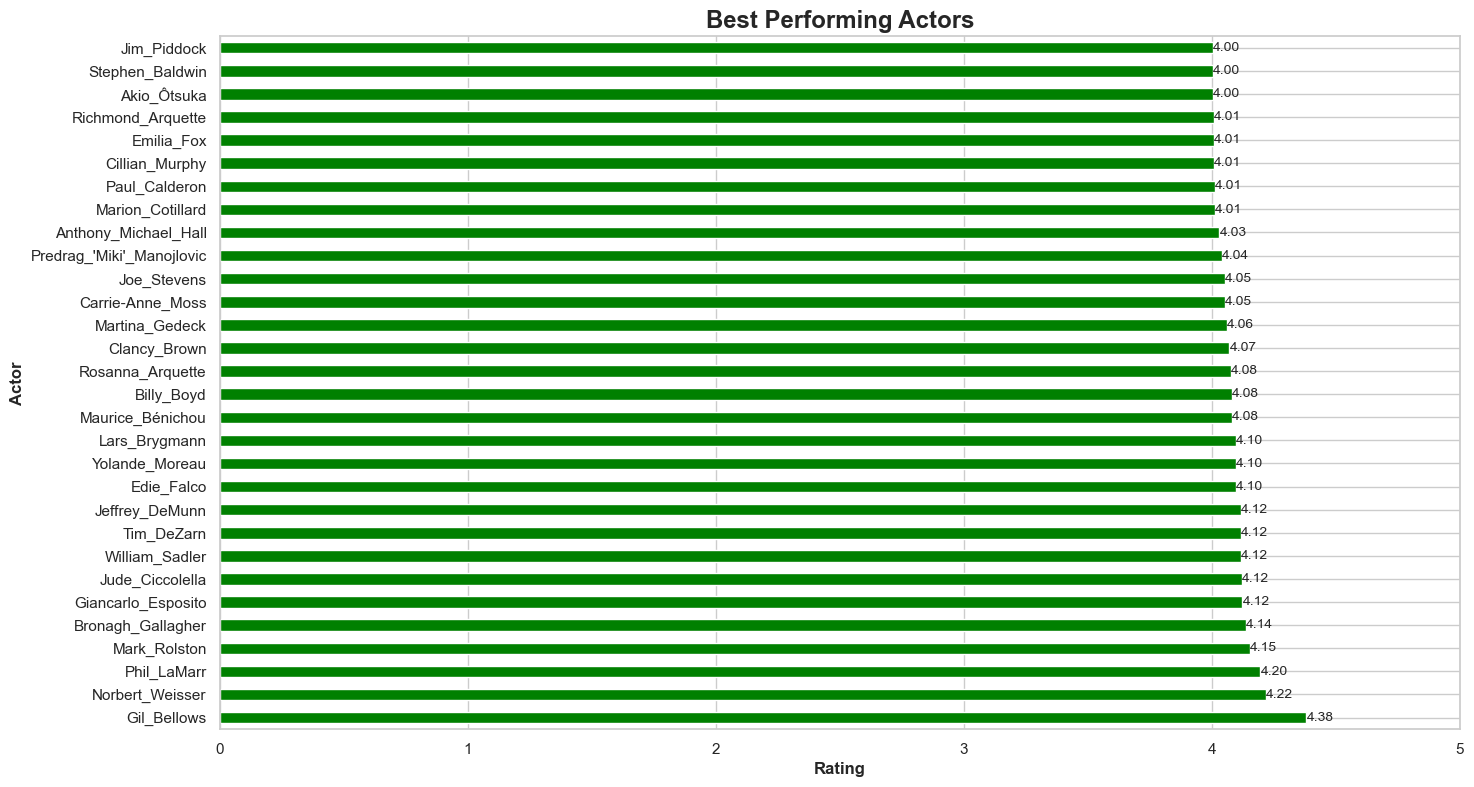

In [557]:
# Plotting the highest rated actors
graph = actor_ratings_to_plot.plot(x="Actor", y="AverageActorRating", kind='barh',   figsize=(16,9), xlim=[0,5],  legend=False, color = "Green")
graph.set_title("Best Performing Actors", fontweight='bold', fontsize="x-large")
graph.set_xlabel("Rating", fontweight='bold')
graph.set_ylabel("Actor", fontweight='bold')
for container in graph.containers:
    graph.bar_label(container, fontsize="small", fmt="%.2f")

Interestingly, our list of best performing actors contain very few *A-List* actors, and mostly obscure and lesser known artists who performs well consistently. This could be due to the fact that they have less reviews under their name than the more well known actors, but since we only included actors with reasonable review data and more than $10$ movies under their belt, this is a surprisingly important discovery, and should be taken into account when recommending movies to the public.

Similarly, we can also investigate the worst performing actors, in order to obtain a list of artists to steer away form recommendations:

In [559]:
# Investigate worst performing actors
actor_ratings_to_plot = actor_ratings_df.sort_values("AverageActorRating", ascending=False).tail(30)
actor_ratings_to_plot.head(30)

,Actor,AverageActorRating,ActorReviewCount,MovieCount
5499,Freddie_Prinze_Jr.,2.584343,10813.0,17
8052,Chris_Kattan,2.574080,3341.0,12
3569,Eddie_Griffin,2.572517,8398.0,21
9417,Brooke_Shields,2.568218,623.0,11
10499,Spencer_Breslin,2.549840,2498.0,11
1659,Joan_Chen,2.546753,5882.0,18
7917,Lochlyn_Munro,2.542679,2882.0,25
6612,Brendan_Fletcher,2.539451,1711.0,20
1833,Robert_Davi,2.539319,6371.0,18
569,Christopher_Lambert,2.539052,6901.0,19


We see much the same effect for poorly performing actors as we did for the best performing actors. Most of these artists are not well known, and we can conclude that they probably star in movies that are more towards the lower end of the budget spectra. Showing this visually:

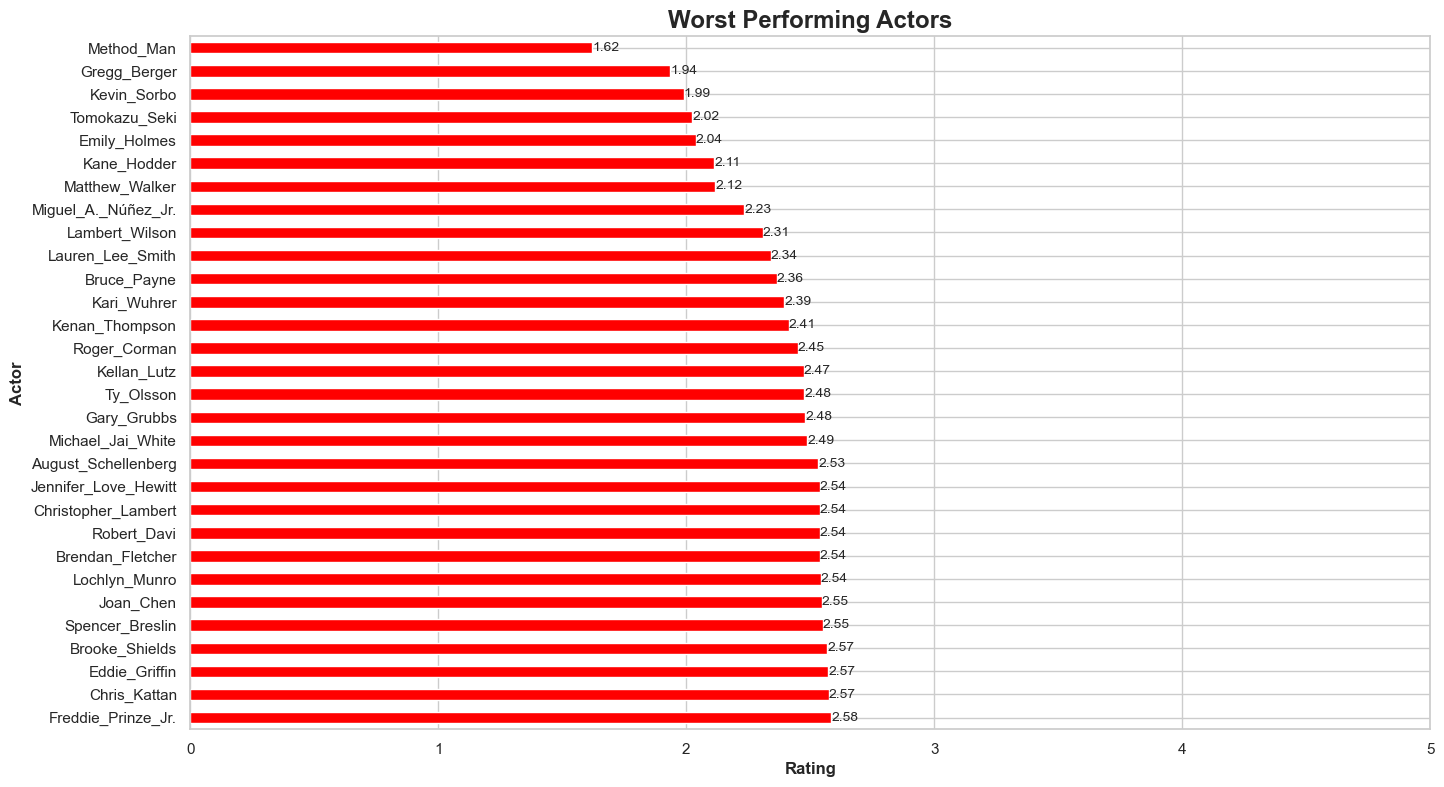

In [560]:
# Plotting the lowest rated actors
graph = actor_ratings_to_plot.plot(x="Actor", y="AverageActorRating", kind='barh',   figsize=(16,9), xlim=[0,5],  legend=False, color = "Red")
graph.set_title("Worst Performing Actors", fontweight='bold', fontsize="x-large")
graph.set_xlabel("Rating", fontweight='bold')
graph.set_ylabel("Actor", fontweight='bold')
for container in graph.containers:
    graph.bar_label(container, fontsize="small", fmt="%.2f")

### 3.3 Correlation between budget and movie rating

In [550]:
# Check if rating goes up as budget does

<a id="four"></a>
## 4. Data Engineering and NLP Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



To capture all the preprocessing happening within the data, we start a comet experiment:

In [551]:
if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = COMET_API_KEY,
    project_name = COMET_PROJECT_NAME,
    workspace= COMET_WORKSPACE
  )

  experiment.add_tag("Data Preprocessing")
  experiment.set_name("Data Preprocessing")

We first begin by reloading the data and discarding the changes made during the EDA section:

Ending the comet experiment for data preprocessing:

In [552]:
if COMET_FLAG:
    experiment.end()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### 5.1 Logistic regression

Logistic regression is a classification algorithm used to predict the probability of a binary outcome based on one or more input features. It models the relationship between the input variables and the probability of the outcome belonging to a particular class. Logistic regression uses the logistic function (also known as the sigmoid function) to map the output of a linear combination of the input features to a value between 0 and 1, representing the probability of belonging to the positive class.
In simpler terms, logistic regression aims to find the best-fitting S-shaped curve that separates the two classes. It estimates the coefficients (weights) of the input features through a process called maximum likelihood estimation, optimizing the parameters to maximize the likelihood of the observed data.

Once trained, logistic regression can make predictions by calculating the probability of the positive class based on the input features. A threshold is then applied to determine the final predicted class.

Logistic regression models are known for their simplicity and interpetability. Since they are more simplistic models, they are relatively quick to train and computationally efficient. They can also be expanded to handle multiclass classification as is the case for our data. This model does assume a linear relationship between the features and the log-odds of the outcome, however, which does not necessarily hold true in many cases. It is also sensitive to outliers and irrelevant features. 

Lets begin our training process, by starting our Comet ML experiment, so that all aspects of the model gets logged for comparison:

In [553]:
if COMET_FLAG:
  # Start comet experiment:
  experiment = Experiment(
    api_key = COMET_API_KEY,
    project_name = COMET_PROJECT_NAME,
    workspace= COMET_WORKSPACE
  )

  experiment.add_tag("LogisticRegression")
  experiment.set_name("LogisticRegression")

else:
  print("Experiment not logged")

Experiment not logged


We begin by initializing a Logistic Regression classifier , and fitting it to the data:


In [554]:
# Creating a Logistic Regression Classifier object:
log_reg = LogisticRegression()

# Fitting the model to our training data subset
log_reg.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

To get a sense of how well this model is performing, let's test the model on the testing subset of our training data:


In [ ]:
# Predict values of the testing subset
pred_log_reg = log_reg.predict(X_test)

# Let's produce a classification report of the model as is:
print(classification_report(y_test, pred_log_reg))

              precision    recall  f1-score   support

        -1.0       0.82      0.26      0.39       278
         0.0       0.62      0.38      0.47       425
         1.0       0.73      0.90      0.81      1755
         2.0       0.78      0.74      0.76       706

    accuracy                           0.73      3164
   macro avg       0.74      0.57      0.61      3164
weighted avg       0.73      0.73      0.71      3164



Form the classification report, we see that our recall is relatively low for our two least represented categories, namely `Anti climate change` and `Neutral` sentiments. Our remaining sentiments scores pretty high in all the metrics we observe. This model performs pretty well in overall predictive performance.


If interested, one can try to gauge the effects of hyperparameter tuning on the model performance. Note: For the purposes of this notebook, hyperparameter tuning will be ignored since it can be very timely to run.

In [ ]:
if HYPERPARAM_TO_Tune["Logistic Regression"]:
    # Set hyper-parameters to tune 
    log_reg_hyperparameters =     {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 5),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500]
    } 

    # Search over hyperparameter grid
    log_reg_gridsearch = GridSearchCV(LogisticRegression(), log_reg_hyperparameters, scoring='f1_weighted', cv =3, n_jobs=3, verbose=3) 

    # Fit grid of models to the data
    log_reg_gridsearch.fit(X_train, y_train)
    best_params = log_reg_gridsearch.best_params_
else:
    log_reg_hyperparameters = {
    'penalty' : "default",
    'C' : "default",
    'solver' : "default",
    'max_iter' : "default"
    } 

    best_params = {
    'penalty' : 'l2',
    'C' : 1.0,
    'solver' : 'lbfgs',
    'max_iter' : 100
    } 

Let us save our metrics for our model considered, in order to log it to CometML later


In [ ]:
if HYPERPARAM_TO_Tune["Logistic Regression"]:
    # Get best predictor:
    best_log_reg = log_reg_gridsearch.best_estimator_

    # Use best estimator to make predictions
    pred_best_log_reg = best_log_reg.predict(X_test)

    # Print optimised classification report:
    print(classification_report(y_test, pred_best_log_reg))

    # Produce confusion matrix, f1 score, precision and recall for model in order to log them to comet
    log_reg_cm = confusion_matrix(y_test, pred_best_log_reg)
    log_reg_f1 = f1_score(y_test, pred_best_log_reg, average="weighted") # average only necessary if model nly deals in binary classification
    log_reg_precision = precision_score(y_test, pred_best_log_reg, average='weighted')
    log_reg_recall = recall_score(y_test, pred_best_log_reg, average="weighted")

else:
    log_reg_cm = confusion_matrix(y_test, pred_log_reg)
    log_reg_f1 = f1_score(y_test, pred_log_reg, average="weighted") # average only necessary if model nly deals in binary classification
    log_reg_precision = precision_score(y_test, pred_log_reg, average='weighted')
    log_reg_recall = recall_score(y_test, pred_log_reg, average="weighted")
    


Next, we log the metrics calculated above to use within comet:


In [ ]:
# Create logging info

# Add all relevant info pertaining to your model here
log_reg_params = {"random_state": RAND_STATE, # DO not remove this one
          "model_type": "log_reg",
          "scaler": "no scaling", # DO not remove this one
          "param_grid": str(log_reg_hyperparameters),
          "best_param": str(best_params),
          "text_feature_count": str(MAX_TEXT_FEATURES), # DO not remove this one
          "vectorizer": VECTORIZER_TO_USE, # DO not remove this one
          "train_test_split": str(TRAIN_TEST_SPLIT_VAR), # DO not remove this one
          "Resample": str(RESAMPLE)
          }
log_reg_metrics = {"f1": log_reg_f1,
           "recall": log_reg_recall,
           "precision": log_reg_precision,
           "confusion_matrix": log_reg_cm
           }

if COMET_FLAG:
    # Log all important info
    experiment.log_parameters(log_reg_params)
    experiment.log_metrics(log_reg_metrics)
    experiment.log_confusion_matrix(matrix=log_reg_cm)

In order to produce a submission to Kaggle, we retrain the model (using the optimised hyperparameters if applicable) on the complete set of training data:


In [ ]:
# Initiate final model
final_log_reg = LogisticRegression( **best_params) # Use determined hyperparameters here

# Train on all available data
final_log_reg.fit(x_train_dataset, y_train_dataset)

# Generate predictions for the evaluation dataset
log_reg_kaggle_predictions = final_log_reg.predict(x_evaluate_dataset)


Finally, we produce a csv of the predictions to submit to Kaggle


In [ ]:
# Produce kaggle submission csv 

# Make submissions into dataframe
df_log_reg_kaggle_predictions = pd.DataFrame(log_reg_kaggle_predictions, columns=["sentiment"])

# Convert sentiment to integer
df_log_reg_kaggle_predictions['sentiment'] = df_log_reg_kaggle_predictions['sentiment'].astype('int')

# Match submissions to tweet id's
df_log_reg_kaggle_submission = pd.concat([df_tweetid_for_submission.reset_index(drop=True), df_log_reg_kaggle_predictions.reset_index(drop=True)], axis=1,)


#Save submission as csv
df_log_reg_kaggle_submission.to_csv('LogisticRegressionPredictions.csv', index=False)

df_log_reg_kaggle_submission

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


Lastly, since we are done with the model, we remember to end the experiment and write logs to Comet ML

In [ ]:
if COMET_FLAG:
    # Ending the experiment
    experiment.end()
else:
    print("Completed Logistic Regression: Experiment not logged")

Completed Logistic Regression: Experiment not logged


Saving the model for later use:

In [ ]:
# Choose a filename to save model as
model_save_path = './Models/LogisticRegression.pkl'

# Save model to specified filename
with open(model_save_path, 'wb') as file:
    pickle.dump(final_log_reg,file)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

To evaluate our model performance, we will make use of the `f1-score` as a metric...


<a id="seven"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



---

In conclusion, our best performing model for predicting sentiment...

#### Future Considerations:


